In [36]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from cofactor.features import Features
from cofactor.model import LatticePredictor
from cofactor.calculator import CofactorCalculator

In [3]:
featgen = Features.from_excel('data/elemental.xlsx')
model = LatticePredictor.from_file('models/model.pkl')
data = pd.read_csv('data/lattices.csv', index_col=0)

In [52]:
temperatures = [25]

x_cerium = np.linspace(0.12, 0.15, 40).reshape(-1, 1)
inputs = {'Ce': x_cerium, 'Zr': 1 - x_cerium, 'T': 25}

X = featgen.get_features(inputs, model.features)

In [66]:
example_eddie = np.array([
    [11.393534002229654, 470.7213578500707],
    [12.508361204013376, 348.5148514851487],
    [12.909698996655514, 300.9900990099011],
    [13.444816053511701, 178.78359264497885],
    [13.846153846153847, 20.367751060820638],
])

cofactors_eddie = np.array([
    [12.497816164285508, 0.9977867711289287],
    [13.000483412177577, 0.9981617632840819],
    [13.498258868069184, 0.9990191227680352]
])

In [59]:
inputs = {
    'Ce': example_eddie[:, 0].reshape(-1, 1) / 100,
    'Zr': 1 - example_eddie[:, 0].reshape(-1, 1) / 100,
    'T': example_eddie[:, 1].reshape(-1, 1)
}
X = featgen.get_features(inputs, model.features)

In [61]:
cofactors = []
for tetr, mono in model.predict_lattice(X[model.features]):
    calc = CofactorCalculator(tetr, mono)
    cofactors.append(calc.get_cofactors())

In [62]:
results = pd.concat([X, pd.DataFrame(cofactors)], axis=1)

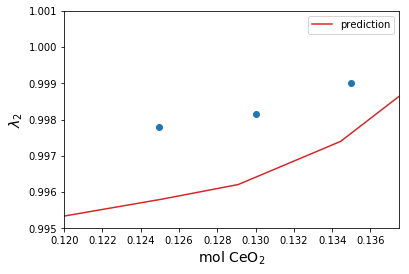

In [88]:
fig, ax = plt.subplots(figsize=(6, 4))

results.plot(x='Ce', y='B', ax=ax, color='#d62728', label='prediction')
ax.scatter(cofactors_eddie[:, 0] / 100, cofactors_eddie[:, 1], marker='o', label='Eddie')

ax.set_ylim(0.995, 1.001)
ax.set_xlim(0.12, 0.1375)
# ax.get_legend().remove()

ax.set_ylabel(r'$\lambda_2$', fontsize=14)
ax.set_xlabel(r'mol CeO$_2$', fontsize=14)

plt.show()